<a href="https://colab.research.google.com/github/AlfonsoPiedrabuena/proyecto_machinelearning/blob/main/2test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [144]:
df_data_raw = pd.read_csv('https://raw.githubusercontent.com/AlfonsoPiedrabuena/proyecto_machinelearning/main/1a879493-1294-47ae-9f35-e960ac4e6dbc_Data.csv')

In [145]:
z = pd.DataFrame(df_data_raw.drop(columns=['Series Name','Country Name','Promeddio','todos']))

In [146]:
df_data_cleancolumns = df_data_raw.drop(['Series Name','Promeddio','todos','Country Name'], axis=1),

In [149]:
df_data_cleancolumns = z.dropna(how='all')
df_data_cleancolumns

,Series Code,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],promedio
0,SG.APL.PSPT.EQ,AFG,..,..,..,..,..,..,..,..,..,..,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0.0980392156862745
1,SG.APL.PSPT.EQ,ALB,..,..,..,..,..,..,..,..,..,..,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,SG.APL.PSPT.EQ,DZA,..,..,..,..,..,..,..,..,..,..,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,SG.APL.PSPT.EQ,AGO,..,..,..,..,..,..,..,..,..,..,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,SG.APL.PSPT.EQ,ARG,..,..,..,..,..,..,..,..,..,..,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15683,UIS.LP.AG15T24.M,VNM,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,218042,..,..,..,..,..,..,..,..,..,408598,..,..,..,..,..,..,..,..,..,417992,357549,..,..,..,..,..,..,..,..,234854,..,..,..,..,..,..,..,..,111185,..,..,291370
15684,UIS.LP.AG15T24.M,URY,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,5054,..,..,..,..,..,..,..,..,..,4059,..,..,..,..,..,..,..,..,..,..,5014,..,..,..,..,..,..,..,..,..,4268,3848,3533,3885,4306,3659,3635,3800,4472,3594,2960,3755,3614,..,..,3966
15685,UIS.LP.AG15T24.M,YEM,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,226595,..,..,..,..,..,..,..,..,..,150671,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,188633
15686,UIS.LP.AG15T24.M,ZWE,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,49211,..,..,..,..,..,..,..,..,..,40117,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,141638,..,..,167959,..,..,..,..,..,..,99731.25


In [158]:
df_data_cleancolumns = df_data_cleancolumns.replace('..',np.nan)

In [159]:
df_data_cleancolumns = df_data_cleancolumns.dropna(how='all')

In [164]:
df_data_cleancolumns

,Series Code,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],promedio
5478,NY.GDP.MKTP.CD,DZA,2723593384.78054,2434727329.809,2001428328.37091,2702960118.28806,2909292864.23204,3136258896.9233,3039834558.74906,3370843065.76735,3852115816.97758,4257218772.15369,4863487492.65763,5077222366.97472,6766766610.86932,8707847924.29022,13210029612.2659,15557934268.4965,17728347374.994,20971901273.271,26364491313.4471,33243422157.6311,42346380830.7708,44348672667.8715,45207088715.6483,48801369800.3675,53698278905.9678,57937868670.1937,63692238160.0493,66746396416.2732,59089067187.3943,55634414465.2104,62048562947.2509,45715614559.7064,48003078388.5401,49945599428.5812,42543178042.4148,41764315330.4366,46941582519.4661,48177612042.1507,48187747528.899,48640653469.3025,54790379458.8877,54744725765.7191,56760318215.3036,67863841333.4195,85332581188.6107,103198251003.394,117027321306.159,134977125918.571,171000653424.751,137211049535.152,161207310515.42,200013038488.906,209058991952.125,209755003250.664,213810023703.446,165979173991.026,160034162957.738,170097230857.956,175414987760.927,171157803367.473,145163902228.168,68311267538.2174
5483,NY.GDP.MKTP.CD,AUT,6592693841.18495,7311749633.36229,7756110210.11966,8374175257.73075,9169983885.71185,9994070615.85997,10887682273.1014,11579431668.9165,12440625312.8685,13582798556.2404,15373005557.0257,17858486066.7474,22059612476.9332,29515467706.796,35189299911.6608,40059206763.056,42959976221.5234,51545758887.6863,62052259073.2493,73937296963.4586,82058912997.2346,71034228443.062,71275287569.5733,72121016546.6524,67985344886.8716,69386774408.0872,99036164939.1618,124168442533.74,133339397080.129,133105805512.22,166463386179.354,173794177961.108,195078126721.763,190379720809.18,203535242741.838,241038283062.645,237250948791.266,212790348404.555,218259904401.956,217185787342.851,196799778883.361,197337879194.631,213377771503.858,261695778781.038,300904221504.842,315974418604.651,335998557270.104,388691445387.353,430294287388.311,400172297860.517,391892746544.69,431120310088.82,409425234155.263,430068712971.867,441996131736.508,381817565893.574,395568644341.038,416207272209.538,454872626780.005,445075391688.156,428965397959.456,182553827261.706
5484,NY.GDP.MKTP.CD,AUS,18577668271.9229,19652816664.8001,19892485160.7123,21507447642.5132,23764139321.3126,25936835031.9185,27268451114.3465,30397580916.116,32665472057.3412,36628961809.8331,41271138985.3287,45149512823.3845,51967289719.6262,63737347853.9398,88831245394.252,97171924074.8327,104921215177.108,110201881165.405,118338596886.984,134712029989.776,149776044568.245,176642284918.147,193770274743.462,177030416471.689,193242166274.226,180235483623.533,182036933407.946,189061672842.774,235658469150.175,299272046250.305,310781069642.17,325315909269.288,324884257479.043,311549325463.744,322213766862.677,367216364716.365,400302731411.229,434568007512.913,398899138574.239,388608221581.652,415222633925.768,378376086723.194,394648911678.527,466488060570.763,612490396927.017,693407758231.845,746054207846.661,853099630996.31,1053995523724.26,927805183330.879,1146138465603.81,1396649906339.35,1546151783872.96,1576184467015.49,1467483705131.74,1351693984524.5

In [174]:
df_general = pd.DataFrame(df_data_cleancolumns.loc[df_data_cleancolumns['Series Code'] == 'SP.POP.TOTL'])
df_general = pd.DataFrame(df_general.reset_index(drop=False, inplace=True))

""


In [79]:
df_data_cleancolumns = np.transpose(df_data_cleancolumns)
pd.DataFrame(df_data_cleancolumns)

ValueError: ignored

In [73]:
df_data_renamecolumns = df_data_cleancolumns.rename({'Series Code':'Series_Code','promedio':'AVG',}, axis=1)

                                                     #'Country Name':'Country_Name',
                                                     #'Country Code':'Country_Code',

AttributeError: ignored

In [6]:
df_data_renamecolumns.np

,Series_Code,Country_Name,Country_Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],AVG
0,SG.APL.PSPT.EQ,Afghanistan,AFG,..,..,..,..,..,..,..,..,..,..,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0.0980392156862745
1,SG.APL.PSPT.EQ,Albania,ALB,..,..,..,..,..,..,..,..,..,..,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,SG.APL.PSPT.EQ,Algeria,DZA,..,..,..,..,..,..,..,..,..,..,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,SG.APL.PSPT.EQ,Angola,AGO,..,..,..,..,..,..,..,..,..,..,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,SG.APL.PSPT.EQ,Argentina,ARG,..,..,..,..,..,..,..,..,..,..,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
serie_Country_Code = pd.Series(df_data_renamecolumns['Country_Code'].unique())
serie_Series_Code = pd.Series(df_data_renamecolumns['Series_Code'].unique())
serie_Series_Code

0        SG.APL.PSPT.EQ
1        SG.HLD.HEAD.EQ
2        SG.LOC.LIVE.EQ
3        SG.GET.JOBS.EQ
4        SG.OBT.DVRC.EQ
             ...       
102         fin18.t.d.2
103         fin18.t.d.1
104    UIS.LP.AG15T24.F
105    UIS.LP.AG15T24.M
106                 NaN
Length: 107, dtype: object

In [8]:
df_series_code = df_data_renamecolumns['Series_Code'].unique()

In [9]:
def avg_dataframe(serie_avg):
    df_data_joined = pd.DataFrame()
    for x_element in serie_avg: 
        df_data_change_t = pd.DataFrame()
        df_data_change_t = pd.DataFrame(df_data_renamecolumns.loc[df_data_renamecolumns['Series_Code']== str(x_element)])
        df_data_change_t = df_data_change_t.reset_index()
        df_data_change_t = pd.Series(df_data_change_t['AVG'], name=str(x_element))
        #df_data_change_t = df_data_change_t.replace('..', np.nan)
        #df_data_change_t = df_data_change_t.dropna(axis=1, how='any')
        #df_data_change_t['AVG']= pd.to_numeric(df_data_change_t['AVG'])
        df_data_joined = df_data_joined.append(df_data_change_t)
        #df_data_joined = df_data_joined.columns({'AVG':str(x_element)})
        #df_data_joined.drop('index', axis=1)
    return(df_data_joined)

In [10]:
df_data_joined_final_mujer =  avg_dataframe(serie_prueba)
df_data_joined_final_mujer

NameError: ignored

In [11]:
df_data_renamecolumns

,Series_Code,Country_Name,Country_Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],AVG
0,SG.APL.PSPT.EQ,Afghanistan,AFG,..,..,..,..,..,..,..,..,..,..,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0.0980392156862745
1,SG.APL.PSPT.EQ,Albania,ALB,..,..,..,..,..,..,..,..,..,..,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,SG.APL.PSPT.EQ,Algeria,DZA,..,..,..,..,..,..,..,..,..,..,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,SG.APL.PSPT.EQ,Angola,AGO,..,..,..,..,..,..,..,..,..,..,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,SG.APL.PSPT.EQ,Argentina,ARG,..,..,..,..,..,..,..,..,..,..,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_SG_APL_PSPT_EQ = pd.DataFrame(df_data_renamecolumns.loc[df_data_renamecolumns['Series_Code']=='SG.APL.PSPT.EQ'])
Serie_SG_APL_PSPT_EQ = pd.Series(df_SG_APL_PSPT_EQ['AVG'])
Serie_SG_APL_PSPT_EQ = Serie_SG_APL_PSPT_EQ.replace('..', np.nan)
Serie_SG_APL_PSPT_EQ = Serie_SG_APL_PSPT_EQ.dropna(how='any')
Serie_SG_APL_PSPT_EQ= pd.to_numeric(Serie_SG_APL_PSPT_EQ)

In [18]:
Serie_SG_APL_PSPT_EQ.describe()

count    140.000000
mean       0.761345
std        0.411028
min        0.000000
25%        0.715686
50%        1.000000
75%        1.000000
max        1.000000
Name: AVG, dtype: float64

In [13]:
df_SP_RUR_TOTL_FE_ZS = pd.DataFrame(df_data_renamecolumns.loc[df_data_renamecolumns['Series_Code']=='SP.RUR.TOTL.FE.ZS'])
Serie_SP_RUR_TOTL_FE_ZS = pd.Series(df_SP_RUR_TOTL_FE_ZS['AVG'])
Serie_SP_RUR_TOTL_FE_ZS = Serie_SP_RUR_TOTL_FE_ZS.replace('..', np.nan)
Serie_SP_RUR_TOTL_FE_ZS = Serie_SP_RUR_TOTL_FE_ZS.dropna(how='any')
Serie_SP_RUR_TOTL_FE_ZS= pd.to_numeric(Serie_SP_RUR_TOTL_FE_ZS)

In [20]:
Serie_SP_RUR_TOTL_FE_ZS.describe()

count    141.000000
mean      22.987874
std       11.669935
min        0.000000
25%       13.256227
50%       22.669485
75%       32.759820
max       47.273306
Name: AVG, dtype: float64

In [33]:
df_UIS_LP_AG15T24_F = pd.DataFrame(df_data_renamecolumns.loc[df_data_renamecolumns['Series_Code']=='UIS.LP.AG15T24.F'])
Serie_UIS_LP_AG15T24_F = pd.Series(df_UIS_LP_AG15T24_F['AVG'])
Serie_UIS_LP_AG15T24_F = Serie_UIS_LP_AG15T24_F.replace('..', np.nan)
Serie_UIS_LP_AG15T24_F = Serie_UIS_LP_AG15T24_F.dropna(how='any')
Serie_UIS_LP_AG15T24_F= pd.to_numeric(Serie_UIS_LP_AG15T24_F)

In [42]:
Serie_UIS_LP_AG15T24_F.describe()

count    1.220000e+02
mean     6.292195e+05
std      2.772063e+06
min      0.000000e+00
25%      2.352238e+03
50%      2.328295e+04
75%      3.391430e+05
max      2.877463e+07
Name: AVG, dtype: float64

In [31]:
SG_GET_JOBS_EQ = pd.DataFrame(df_data_renamecolumns.loc[df_data_renamecolumns['Series_Code']=='SG.GET.JOBS.EQ'])
Serie_SG_GET_JOBS_EQ = pd.Series(SG_GET_JOBS_EQ['AVG'])
Serie_SG_GET_JOBS_EQ = Serie_SG_GET_JOBS_EQ.replace('..', np.nan)
Serie_SG_GET_JOBS_EQ = Serie_SG_GET_JOBS_EQ.dropna(how='any')
Serie_SG_GET_JOBS_EQ= pd.to_numeric(Serie_SG_GET_JOBS_EQ)

In [40]:
Serie_SG_GET_JOBS_EQ.describe()


count    140.000000
mean       0.825210
std        0.315532
min        0.000000
25%        0.779412
50%        1.000000
75%        1.000000
max        1.000000
Name: AVG, dtype: float64

In [35]:
SG_OBT_DVRC_EQ = pd.DataFrame(df_data_renamecolumns.loc[df_data_renamecolumns['Series_Code']=='SG.OBT.DVRC.EQ'])
Serie_SG_OBT_DVRC_EQ = pd.Series(SG_OBT_DVRC_EQ['AVG'])
Serie_SG_OBT_DVRC_EQ = Serie_SG_OBT_DVRC_EQ.replace('..', np.nan)
Serie_SG_OBT_DVRC_EQ = Serie_SG_OBT_DVRC_EQ.dropna(how='any')
Serie_SG_OBT_DVRC_EQ= pd.to_numeric(Serie_SG_OBT_DVRC_EQ)

In [38]:
Serie_SG_OBT_DVRC_EQ.describe()

count    140.000000
mean       0.687815
std        0.438597
min        0.000000
25%        0.029412
50%        1.000000
75%        1.000000
max        1.000000
Name: AVG, dtype: float64

In [44]:
pd.DataFrame({'SG_APL_PSPT_EQ': Serie_SG_APL_PSPT_EQ, 'SG_GET_JOBS_EQ': Serie_SG_GET_JOBS_EQ,'SG_OBT_DVRC_EQ':Serie_SG_OBT_DVRC_EQ})

TypeError: ignored

In [80]:
Series_temp = [Serie_SG_APL_PSPT_EQ,Serie_SG_GET_JOBS_EQ,Serie_SG_OBT_DVRC_EQ]


In [176]:
Serie_SG_APL_PSPT_EQ

0      0.098039
1      1.000000
2      0.000000
3      1.000000
4      1.000000
         ...   
143    1.000000
144    1.000000
145    0.000000
146    1.000000
147    0.000000
Name: AVG, Length: 140, dtype: float64

In [81]:
DataFrame_Temp = pd.DataFrame(Series_temp)
DataFrame_Temp = np.transpose(DataFrame_Temp)

In [63]:
DataFrame_Temp.dropna(how='all')

,AVG,AVG,AVG
0,0.098039,NaN,NaN
1,1.000000,NaN,NaN
2,0.000000,NaN,NaN
3,1.000000,NaN,NaN
4,1.000000,NaN,NaN
...,...,...,...
735,NaN,NaN,1.0
736,NaN,NaN,1.0
737,NaN,NaN,0.0
738,NaN,NaN,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


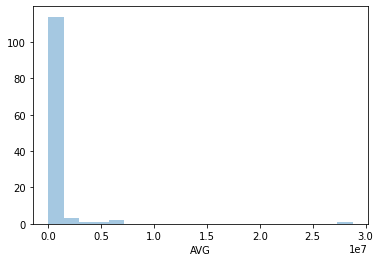

In [30]:
sns.distplot(Serie_SG_GET_JOBS_EQ, kde=False, norm_hist=False, bins=20)